In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load results
data = pd.read_csv("../data/final_xlk_data.csv")
# Convert Date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [7]:
# Define the fixed investment amount
fixed_investment = 1000  # Amount to invest each month

# Create a DataFrame for cumulative returns
investment_results = []  # To store cumulative returns
cumulative_return = 0.0  # Start with zero cumulative return

# Sort the data by Date
data = data.sort_values("Date").reset_index(drop=True)

# Loop through each month and calculate cumulative returns
for i in range(len(data)):
    monthly_return = float(data.loc[i, "Monthly_Return"])  # Ensure scalar value
    
    # Calculate total return from the fixed investment
    cumulative_return += monthly_return * fixed_investment
    
    # Store the result for this month
    investment_results.append({
        "month": data.loc[i, "Date"],
        "cumulative_return": cumulative_return
    })

# Convert results to DataFrame
investment_df = pd.DataFrame(investment_results)

# Ensure data types are correct for plotting
investment_df["month"] = pd.to_datetime(investment_df["month"])  # Convert month column to datetime
investment_df["cumulative_return"] = investment_df["cumulative_return"].astype(float)  # Ensure numeric type

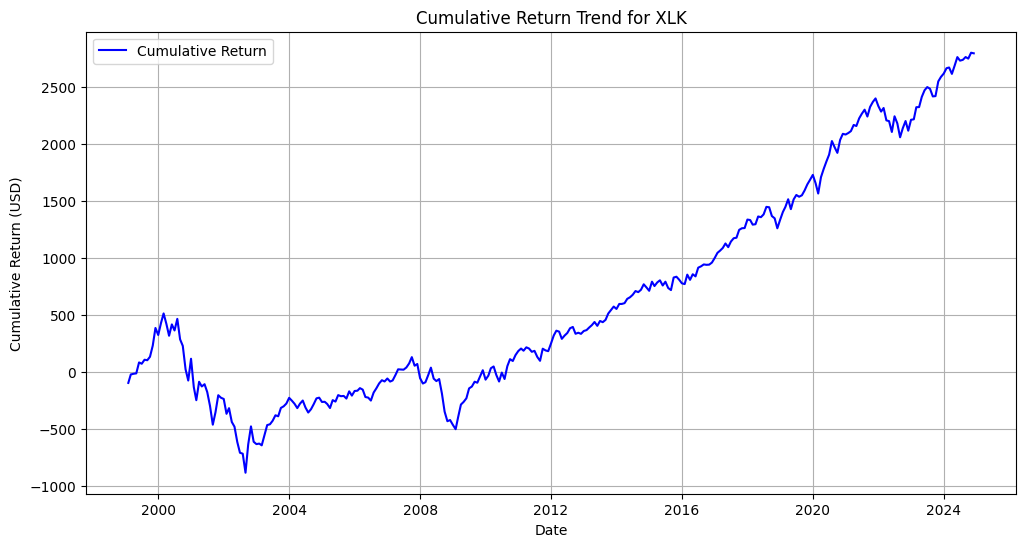

In [8]:
# Plot cumulative return trend
plt.figure(figsize=(12, 6))
plt.plot(investment_df["month"].values, investment_df["cumulative_return"].values, label="Cumulative Return", color='blue')
plt.xlabel("Date")
plt.ylabel("Cumulative Return (USD)")
plt.title("Cumulative Return Trend for XLK")
plt.legend()
plt.grid()
plt.show()